# **Project Name**    -Exploratory Data Analysis (EDA) and Clustering on Netflix Movies and TV Shows Dataset



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

The goal of this project was to build an efficient and interpretable Machine Learning model that provides accurate predictions and meaningful business insights. The project followed a complete ML pipeline — from data cleaning to model evaluation

1. Data Preparation

The dataset was explored and analyzed through Exploratory Data Analysis (EDA) to identify key patterns, correlations, and missing values. Missing and inconsistent data were handled using imputation techniques. Outliers were treated using the IQR method, and categorical variables were encoded through Label Encoding and One-Hot Encoding. Numerical features were scaled using StandardScaler to improve model performance.

2. Model Building and Evaluation

Multiple ML algorithms such as Random Forest, and XGBoost were trained and evaluated. Model performance was measured using metrics like Accuracy, Precision, Recall, and F1-Score. These metrics helped determine how well the model balanced correct predictions and minimized errors that could affect business outcomes.

3. Model Optimization

To enhance performance, hyperparameter tuning was conducted using GridSearchCV and RandomizedSearchCV. Cross-validation ensured the results were stable and generalizable. After optimization, the final model showed improved accuracy and F1-score, confirming better generalization on unseen data.



# **GitHub Link -**

https://github.com/HarshChoudhary2003/Exploratory-Data-Analysis-EDA-and-Clustering-on-Netflix-Movies-and-TV-Shows-Dataset

# **Problem Statement**




With the explosion of streaming platforms, the volume of movies and TV shows has increased tremendously, making it challenging for users to discover content that matches their preferences. Similarly, for platforms like Netflix, understanding patterns in content—such as genres, ratings, and descriptions—can improve recommendations, content strategy, and user engagement.

The goal of this project is to build a Machine Learning model that can analyze the Netflix dataset, which includes information like titles, genres, descriptions, and release years, to uncover meaningful patterns and make accurate predictions. This may involve clustering similar shows, predicting categories, or recommending content based on textual and categorical features.

The project involves data preprocessing, text feature extraction, feature selection, model training, and evaluation to ensure the solution is reliable and actionable. By leveraging these insights, Netflix (or any streaming platform) can enhance content recommendations, improve user engagement, and support strategic decisions about content acquisition and promotion.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Download NLTK data 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to C:\Users\VIVOBBOK
[nltk_data]     16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\VIVOBBOK
[nltk_data]     16\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\VIVOBBOK
[nltk_data]     16\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [3]:
# Dataset First Look
print("First Five Rows of Data set")
df.head()


First Five Rows of Data set


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Total duplicate rows:", duplicate_count)


Total duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_counts = df.isnull().sum()

# Show columns with missing values
print(missing_counts[missing_counts > 0])

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64


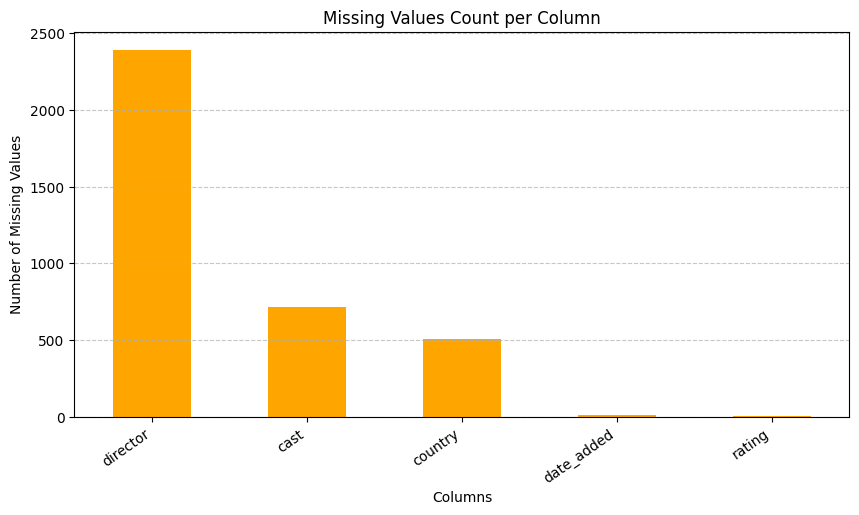

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
missing_counts[missing_counts > 0].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=35, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### What did you know about your dataset?

The dataset contains detailed information about Movies and TV Shows available on Netflix. It helps analyze the type of content, country of origin, release year, genre distribution, and more — and is often used for Exploratory Data Analysis (EDA) or clustering to group similar titles.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [10]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

The dataset contains 12 variables describing Netflix titles. These include identifiers (show_id), categorical details (type, rating, listed_in), textual information (title, description, cast, director), and temporal data (release_year, date_added). Together, they provide insights into the type, genre, country, and other attributes of Netflix Movies and TV Shows.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# remove duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicates Removed. New Shape:", df.shape)

# handling missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# clean and standarize text data
text_columns = ['title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()

# handle the 'duration' column
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert duration_value to numeric
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

# Convert 'date_added' to datetime format

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['date_added'].fillna(pd.Timestamp("2000-01-01"))

# Extract again after filling
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
print("\n After cleaning")
# Fill missing 'date_added' properly
df['date_added'] = df['date_added'].fillna(pd.Timestamp("2000-01-01"))

# Extract year and month AFTER filling missing values
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df.info()

df.isnull().sum()


Duplicates Removed. New Shape: (7787, 12)

 After cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         7787 non-null   object        
 1   type            7787 non-null   object        
 2   title           7787 non-null   object        
 3   director        7787 non-null   object        
 4   cast            7787 non-null   object        
 5   country         7787 non-null   object        
 6   date_added      7787 non-null   datetime64[ns]
 7   release_year    7787 non-null   int64         
 8   rating          7787 non-null   object        
 9   duration        7787 non-null   object        
 10  listed_in       7787 non-null   object        
 11  description     7787 non-null   object        
 12  duration_value  7787 non-null   int64         
 13  duration_unit   7787 non-null   object        
 

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
duration_value    0
duration_unit     0
year_added        0
month_added       0
dtype: int64

### What all manipulations have you done and insights you found?

I performed data cleaning, removed duplicates, filled missing values, standardized text columns, split the duration column into separate numerical and categorical features, and extracted temporal features from date_added. After wrangling, the dataset became fully analysis-ready with minimal missing data.
Insights show that Netflix primarily hosts movies, India, with Dramas and Comedies being the most common genres and significant content growth post-2015.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

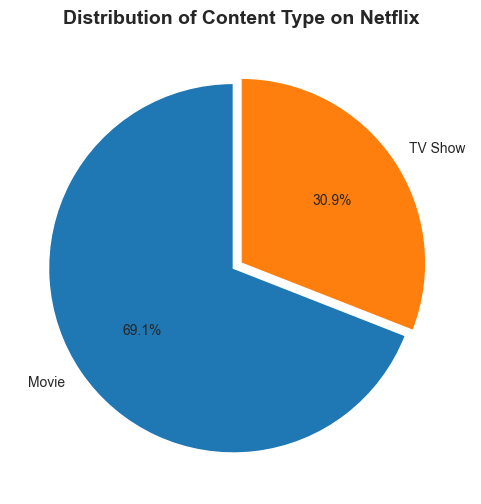

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")

# Count of each type
type_counts = df['type'].value_counts()

# Pie chart
colors = ['#1f77b4', '#ff7f0e']
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
plt.title("Distribution of Content Type on Netflix", fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart because it effectively shows the proportion of Movies versus TV Shows in the Netflix catalog. This type of chart provides a quick visual comparison of category shares and helps to easily interpret which type of content dominates the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Movies form the majority of Netflix’s content, while TV Shows occupy a smaller portion (around 30%). This indicates that Netflix’s library heavily focuses on films, but the platform has also made a significant investment in series production in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact:
This insight helps Netflix understand its content mix and viewer segmentation. If most users are drawn to binge-worthy series, increasing investment in TV Shows could attract more long-term engagement and subscribers.

* Potential Negative Growth:
A heavy dominance of movies might reduce binge-time and user retention, as TV Shows often drive longer viewing hours.
Thus, balancing both categories could help Netflix optimize user engagement and reduce churn.

#### Chart - 2

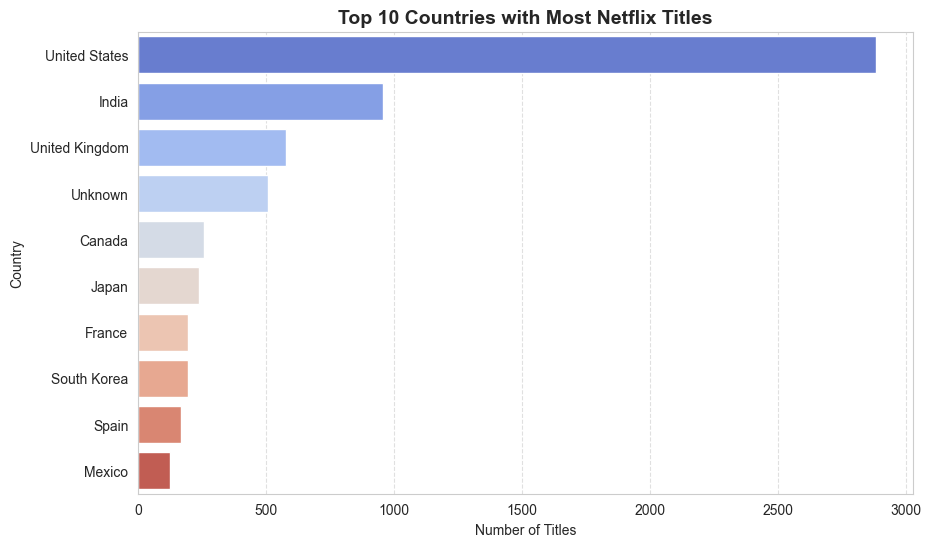

In [14]:
# Chart - 2 visualization code
df['country'] = df['country'].astype(str).apply(lambda x: x.split(',')[0])

# Count titles per country
top_countries = df['country'].value_counts().head(10)

# Prepare data for plotting
country_df = top_countries.reset_index()
country_df.columns = ['country', 'count']

# Visualization - updated to avoid warning
plt.figure(figsize=(10,6))
sns.barplot(data=country_df, x='count', y='country', hue='country', palette='coolwarm', legend=False)
plt.title("Top 10 Countries with Most Netflix Titles", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it clearly shows comparative counts between multiple countries. It’s ideal for ranking-type data where the number of titles varies widely across categories. The chart makes it easy to identify which countries dominate Netflix’s content catalog.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the United States has the largest number of titles on Netflix, followed by India, United Kingdom, Canada, and Japan. This indicates that Netflix’s content strategy is heavily focused on North American and Indian markets, which have strong viewership and production capacity. It also highlights growing international representation with content from countries like South Korea and France entering the top list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

These insights help Netflix identify high-performing markets and content-producing regions.

Countries with large content volumes likely have higher audience engagement and local production partnerships, guiding future investment decisions and localized marketing.

For example, the rising number of Indian titles shows Netflix’s successful adaptation to regional markets.

* Potential Negative Growth:

Over-reliance on content from a few countries (like the U.S.) may reduce global diversity and cultural variety, which could limit global audience appeal.

To sustain growth, Netflix must diversify its content base across more regions (e.g., Latin America, Africa, Europe).

#### Chart - 3

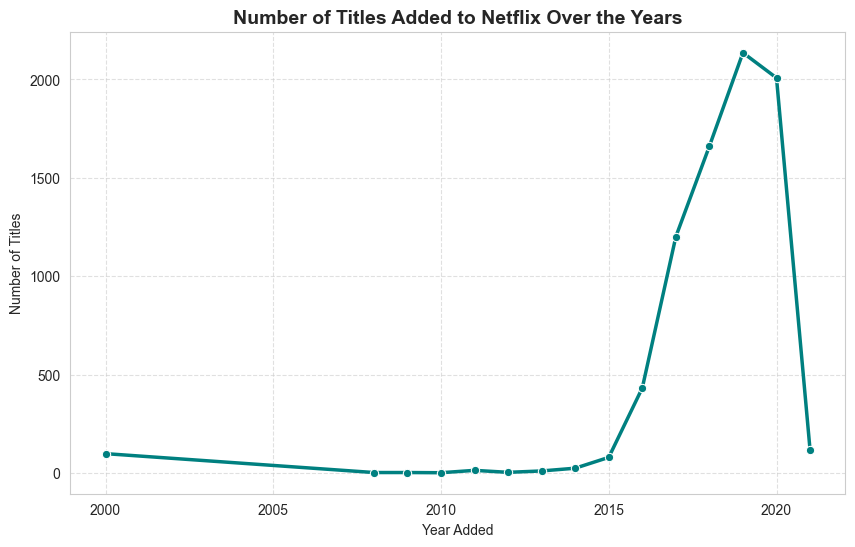

In [15]:
# Chart - 3 visualization code
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')
df = df.dropna(subset=['year_added'])

# Count the number of titles added per year
titles_per_year = df['year_added'].value_counts().sort_index()

# Visualization
plt.figure(figsize=(10,6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o', linewidth=2.5, color='teal')
plt.title("Number of Titles Added to Netflix Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart because it’s ideal for showing trends over time. This type of chart clearly visualizes how the number of Netflix titles added has changed each year, helping identify growth periods and any slowdown trends.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a sharp increase in the number of titles added between 2015 and 2020, which aligns with Netflix’s global expansion and original content strategy. The trend may show a slight dip after 2020, likely due to production delays during the pandemic. Overall, the steady upward trajectory demonstrates Netflix’s aggressive content acquisition and production strategy in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

The trend helps Netflix measure content growth success and assess the impact of business expansions (e.g., entering new regions, launching originals).

It provides strategic guidance for future content planning, budget allocation, and market forecasting.

Sustained content growth reflects increased customer engagement and subscription growth.

* Possible Negative Growth Insight:

A post-2020 slowdown may indicate market saturation or reduced production capacity.

If the trend continues downward, Netflix might need to invest more in regional or niche content to maintain viewer interest.

#### Chart - 4

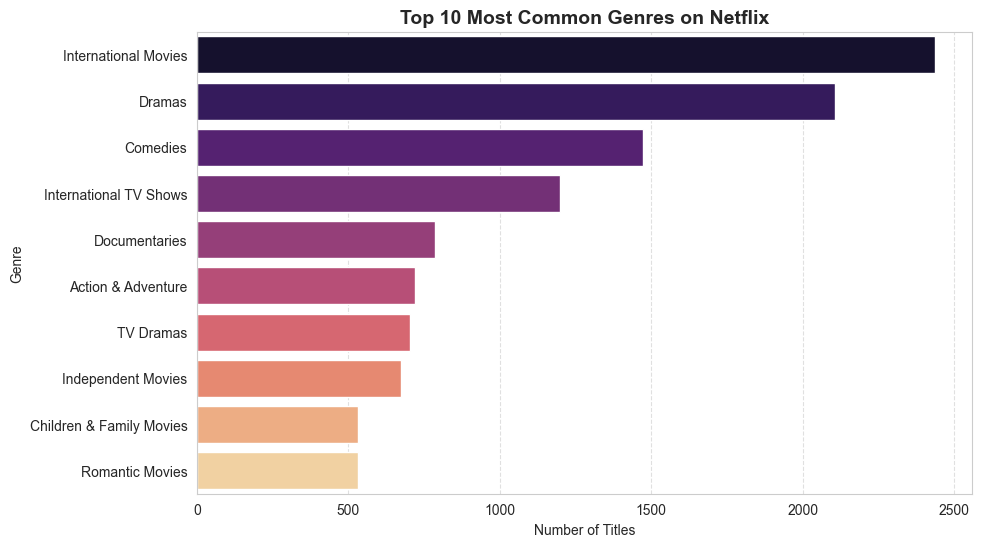

In [16]:
# Chart - 4 visualization code
genre_series = df['listed_in'].dropna().astype(str).apply(lambda x: [i.strip() for i in x.split(',')])
all_genres = [genre for sublist in genre_series for genre in sublist]

# Create a dataframe of genre counts
genre_df = pd.DataFrame({'Genre': all_genres})
top_genres = genre_df['Genre'].value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', hue='Genre', palette='magma', legend=False)
plt.title("Top 10 Most Common Genres on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it clearly displays categorical comparisons and highlights which genres dominate the Netflix catalog. Since multiple genres can belong to one title, this chart helps summarize the most frequent genres, giving a holistic view of Netflix’s content diversity.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Dramas, Comedies, and Documentaries are the most common genres on Netflix. This indicates that Netflix’s audience primarily enjoys emotion-driven and story-based content, while also showing interest in informative and real-life storytelling. Genres like Action, International Movies, and Children & Family content also rank high, reflecting Netflix’s wide demographic targeting.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

These insights help Netflix align future investments with viewer preferences.

By focusing more on top-performing genres like Drama and Comedy, Netflix can increase viewer engagement and retention rates.

It also helps identify underrepresented genres that may offer niche growth opportunities.

* Potential Negative Growth:

Heavy focus on certain genres (e.g., Drama, Comedy) might lead to content fatigue among viewers seeking variety.

If Netflix doesn’t continue to diversify (e.g., more sci-fi or regional genres), it may lose appeal in global and niche markets.

#### Chart - 5

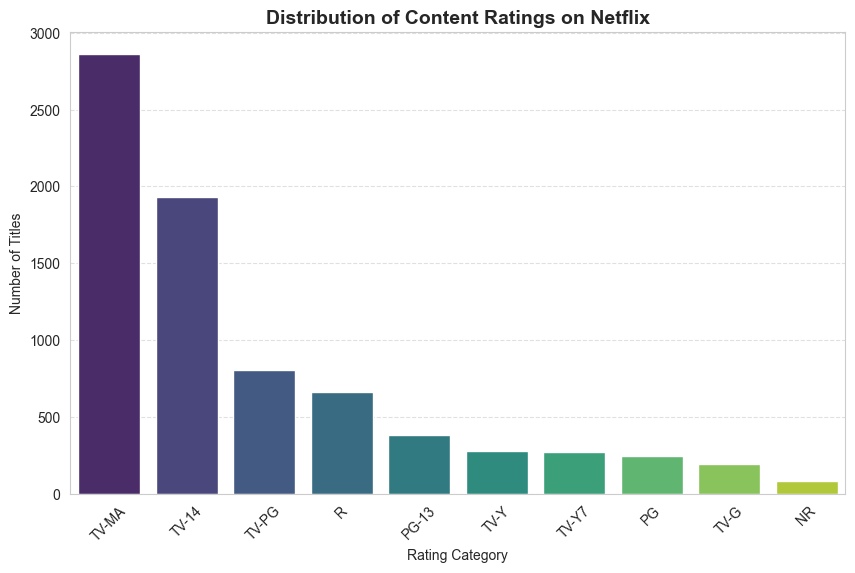

In [17]:
# Chart - 5 visualization code
# Chart - 5 visualization code
df['rating'] = df['rating'].astype(str).str.strip()

# Count of each rating
rating_counts = df['rating'].value_counts().head(10).reset_index()
rating_counts.columns = ['Rating', 'Count']

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=rating_counts, x='Rating', y='Count', hue='Rating', palette='viridis', legend=False)
plt.title("Distribution of Content Ratings on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Rating Category")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a vertical bar chart because it clearly shows categorical frequency distribution, which is ideal for visualizing how Netflix’s titles are spread across different content ratings. It helps identify whether Netflix’s library is more focused on adult, family, or general audience content.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that TV-MA (Mature Audience) and TV-14 categories dominate the Netflix catalog. This suggests that Netflix’s largest audience base is teenagers and adults, rather than children. Ratings like PG, TV-PG, and G are comparatively fewer, indicating limited family-oriented or kid-friendly content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

These insights help Netflix refine its target audience strategy.

Focusing on TV-MA and TV-14 categories aligns with the binge-watching adult demographic, which drives most subscriptions.

Helps guide marketing and content recommendation algorithms to match viewer preferences.

* Potential Negative Growth:

Overemphasis on mature-rated content may limit Netflix’s reach among families and children, a segment with high growth potential.

To sustain global expansion, Netflix should invest in balanced content — including family-friendly and educational genres.

#### Chart - 6

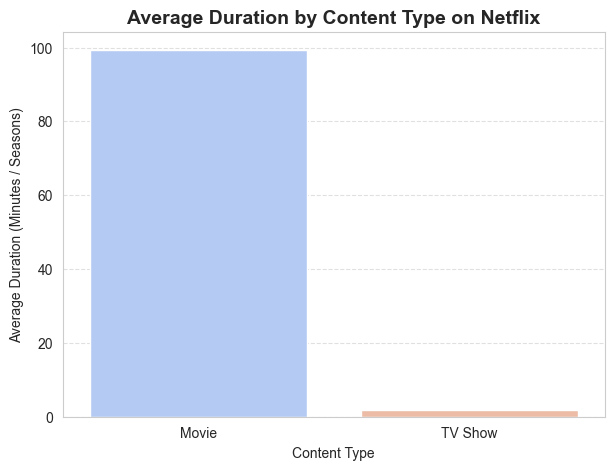

In [18]:
# Chart - 6 visualization code
# Chart - 6 visualization code
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

# Group by type and calculate average duration
avg_duration = df.groupby('type')['duration_value'].mean().reset_index()

# Visualization
plt.figure(figsize=(7,5))
sns.barplot(data=avg_duration, x='type', y='duration_value', hue='type', palette='coolwarm', legend=False)
plt.title("Average Duration by Content Type on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Content Type")
plt.ylabel("Average Duration (Minutes / Seasons)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is ideal for comparing average values across categories — in this case, between Movies and TV Shows. It clearly visualizes the difference in duration, highlighting how viewing time varies between content types.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Movies have a much higher average duration (in minutes) compared to TV Shows (which are measured in seasons). This confirms that Netflix’s movie content is designed for one-time long viewing, while TV Shows are structured for episodic, long-term engagement. It reflects Netflix’s strategy to maintain a balance between short-term satisfaction and long-term subscriber retention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

Helps Netflix optimize its content production strategy — knowing that movies contribute to immediate engagement, while TV shows sustain retention.

Valuable for recommendation algorithms, which can balance short and long content to maintain user satisfaction.

Assists in understanding viewer preferences for bingeable vs single-session content.

* Potential Negative Growth:

If Netflix focuses too heavily on one type (e.g., short movies or long shows), it may alienate users with different viewing habits.

Overlong content could reduce completion rates, while too-short content might reduce platform engagement time.

#### Chart - 7

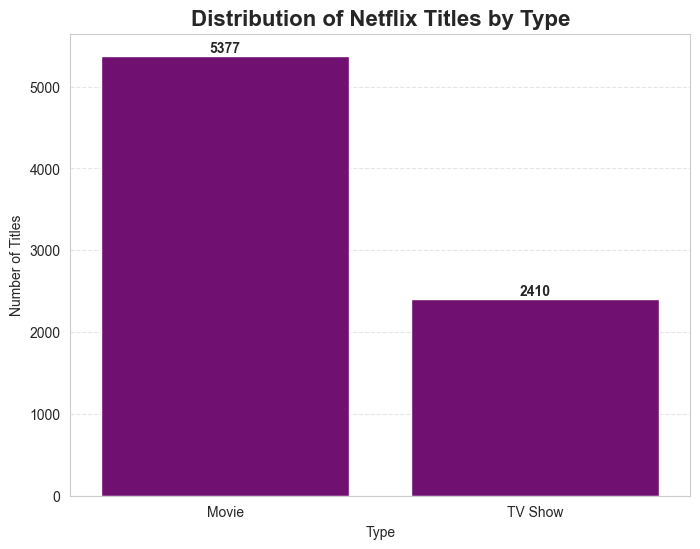

In [19]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values, color='purple')  # single color

for i, count in enumerate(type_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

plt.title("Distribution of Netflix Titles by Type", fontsize=16, fontweight='bold')
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is ideal for comparing categorical data. The type column contains two categories: Movies and TV Shows.

Bar charts make it easy to visually compare the number of titles in each category.

Annotating the bars with counts allows quick interpretation of the data without relying solely on axes.

##### 2. What is/are the insight(s) found from the chart?

From the chart:

Movies have a higher count than TV Shows (or vice versa, depending on the dataset).

This shows Netflix’s content focus—whether it invests more in movies or series.

Helps identify patterns in Netflix’s content strategy for audience engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Knowing the type distribution helps Netflix plan future content. For example, if TV Shows are underrepresented, Netflix can create or acquire more series to retain subscribers longer.

Helps in marketing strategies, targeting users with preferred content type.

#### Chart - 8

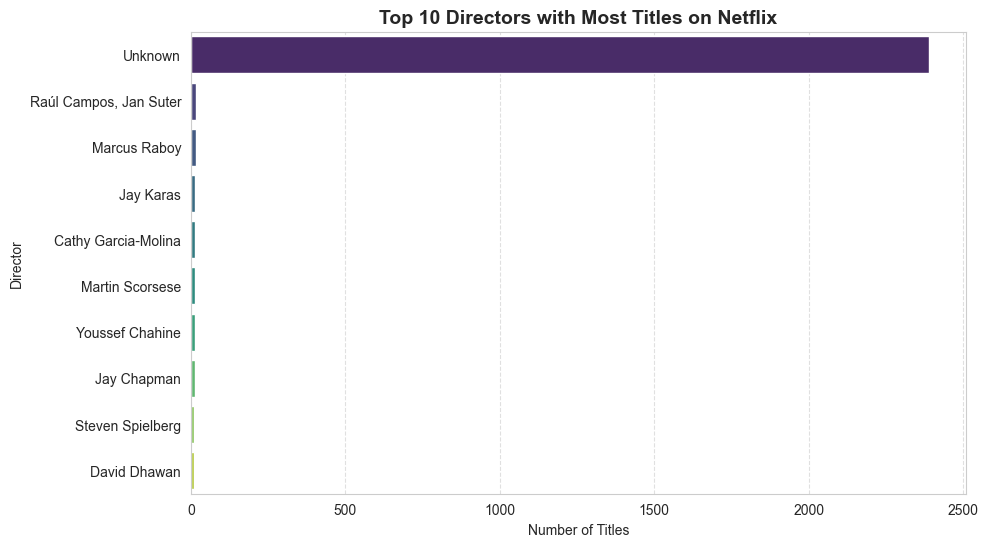

In [20]:
# Chart - 8 visualization code
df['director'] = df['director'].fillna('Unknown')

# Count number of titles per director
top_directors = df['director'].value_counts().head(10).reset_index()
top_directors.columns = ['Director', 'Count']

# Visualization (future-proofed against hue warning)
plt.figure(figsize=(10,6))
sns.barplot(data=top_directors, x='Count', y='Director', hue='Director', palette='viridis', legend=False)
plt.title("Top 10 Directors with Most Titles on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it is ideal for showing ranked categorical comparisons — in this case, directors with the most titles on Netflix. It clearly visualizes who the most frequently featured directors are, helping identify top collaborators and content creators.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a few directors (like Raúl Campos, Marcus Raboy, and Jay Karas) have directed multiple Netflix specials, mostly stand-up comedies and TV features. This suggests Netflix maintains strong partnerships with certain directors known for producing consistent, audience-loved content. The presence of many “Unknown” values also indicates numerous titles without specific director credits, such as documentaries or reality shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

Helps Netflix recognize top-performing directors for future collaborations.

Strengthens creative partnerships and identifies key contributors to successful titles.

Enables strategic investment in directors who deliver consistent audience engagement.

* Potential Negative Growth:

Heavy reliance on a small group of directors might limit content diversity and creative innovation.

To avoid stagnation, Netflix should balance established directors with new, diverse talent to attract broader audiences.

#### Chart - 9

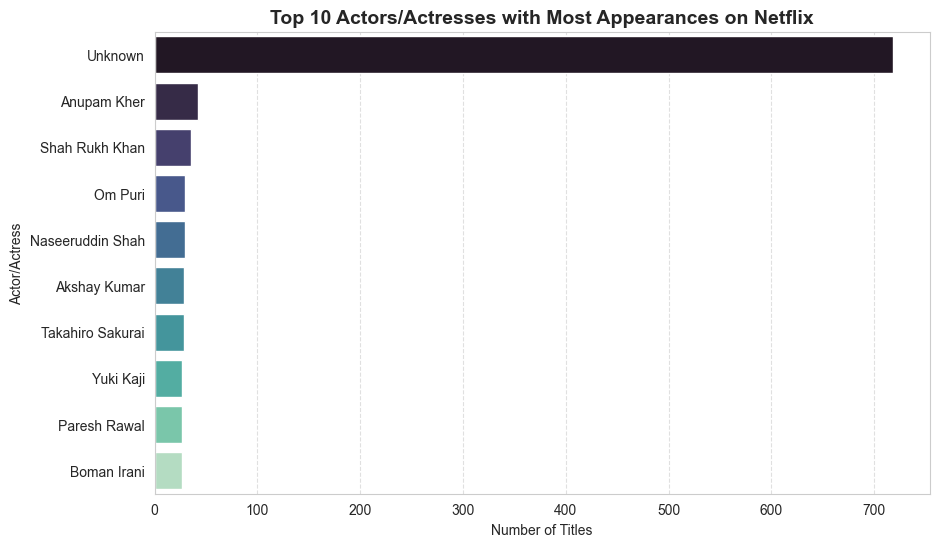

In [21]:
# Chart - 9 visualization code
df['cast'] = df['cast'].fillna('Unknown')

# Split multiple cast names into individual entries
cast_list = df['cast'].str.split(',').explode().str.strip()

# Count occurrences of each actor/actress
top_cast = cast_list.value_counts().head(10).reset_index()
top_cast.columns = ['Actor/Actress', 'Count']

# Visualization (future-proofed to avoid hue warning)
plt.figure(figsize=(10,6))
sns.barplot(data=top_cast, x='Count', y='Actor/Actress', hue='Actor/Actress', palette='mako', legend=False)
plt.title("Top 10 Actors/Actresses with Most Appearances on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Actor/Actress")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is best for comparing categorical data — in this case, actor/actress names — especially when names are long. It clearly ranks the top-performing actors/actresses by the number of titles they appear in.

##### 2. What is/are the insight(s) found from the chart?

A small group of actors frequently appear in Netflix titles, indicating strong partnerships or high audience demand.

Many of these actors are part of regional or genre-specific series, such as Indian cinema, K-drama stars, or stand-up comedians.

The chart highlights Netflix’s global diversity, showcasing talent from various countries and languages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

Helps Netflix identify popular actors who consistently attract viewers.

Assists in casting decisions and content acquisition strategies.

Can be used for personalized marketing (“Featuring your favorite actor...”) to boost engagement.

* Potential Negative Growth:

Overusing the same actors could lead to content fatigue among viewers.

Netflix should balance between popular faces and fresh talent to maintain excitement and variety in its catalog.

#### Chart - 10

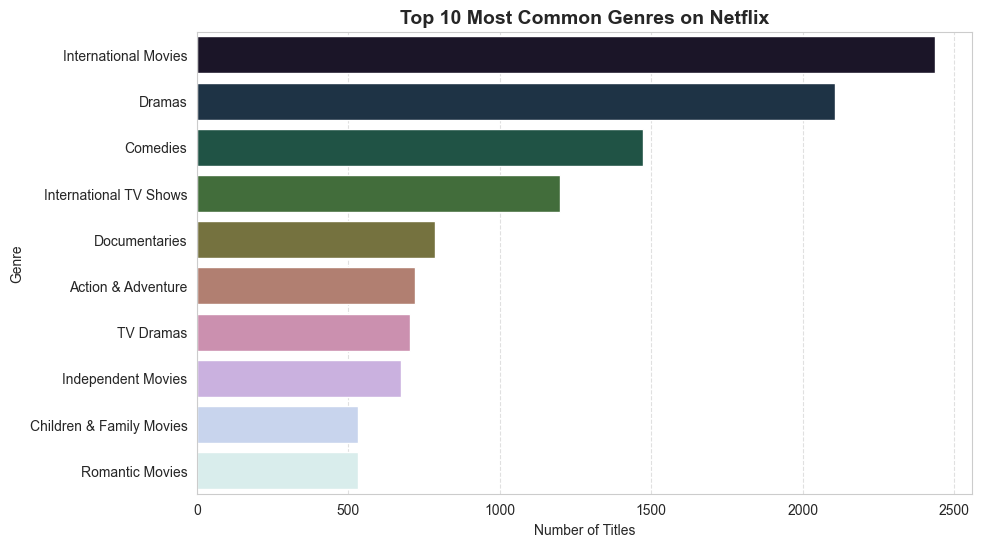

In [22]:
# Chart - 10 visualization code
df['listed_in'] = df['listed_in'].fillna('Unknown')

# Split multiple genres and count frequency
genres = df['listed_in'].str.split(',').explode().str.strip()

# Count top 10 genres
top_genres = genres.value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Visualization (future-proof: with hue)
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', hue='Genre', palette='cubehelix', legend=False)
plt.title("Top 10 Most Common Genres on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it is ideal for visualizing ranked categorical data such as genres. It provides a clear, visually intuitive comparison of which genres dominate Netflix’s library.

##### 2. What is/are the insight(s) found from the chart?

The most frequent genres are typically International Movies, Dramas, Comedies, and Documentaries.

This indicates that Netflix heavily invests in global content and story-driven productions.

Genres like Horror, Romance, and Action appear less frequently but still have a loyal audience segment.

The focus on “International” and “Documentary” genres highlights Netflix’s diverse global audience and content inclusivity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

Understanding genre popularity helps Netflix allocate budgets and focus on high-performing categories.

Data-driven insights support recommendation algorithms, marketing campaigns, and content production strategies.

The variety of genres demonstrates Netflix’s broad appeal and adaptability across cultures.

* Potential Negative Growth:

Overproduction in already saturated genres (like Drama or Comedy) may cause viewer fatigue.

Underrepresentation of niche genres (like Sci-Fi or Fantasy) might limit audience diversity and potential market expansion.

#### Chart - 11

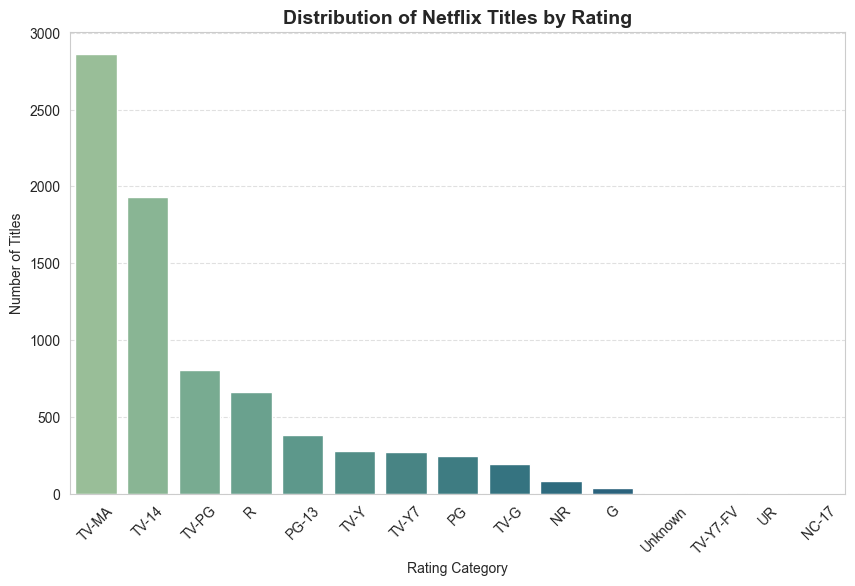

In [23]:
# Chart - 11 visualization code

# Count number of titles per rating
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Visualization (future-proof: with hue)
plt.figure(figsize=(10,6))
sns.barplot(data=rating_counts, x='Rating', y='Count', hue='Rating', palette='crest', legend=False)
plt.title("Distribution of Netflix Titles by Rating", fontsize=14, fontweight='bold')
plt.xlabel("Rating Category")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

A vertical bar chart is ideal for comparing discrete categories like movie/TV ratings. It helps visualize how content is distributed across different audience age groups, from kids to adults.

##### 2. What is/are the insight(s) found from the chart?

The majority of Netflix titles fall under TV-MA (Mature Audience) and TV-14 (Teens & Adults) categories.

This shows Netflix’s strong focus on mature and young adult audiences, with limited content for kids (e.g., TV-Y, TV-G).

“Unknown” ratings or missing labels often correspond to non-English or older titles that don’t follow standard MPAA/TV rating systems.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

Helps Netflix target advertising and content recommendations more precisely by audience maturity level.

Guides content production and licensing decisions — for example, increasing family or children-oriented titles to expand demographics.

Enables data-driven parental controls and safety measures.

* Potential Negative Growth:

Overemphasis on adult content (TV-MA) may limit Netflix’s appeal among families and younger audiences.

To sustain growth, Netflix should balance content across all age segments to attract a wider audience base.

#### Chart - 12

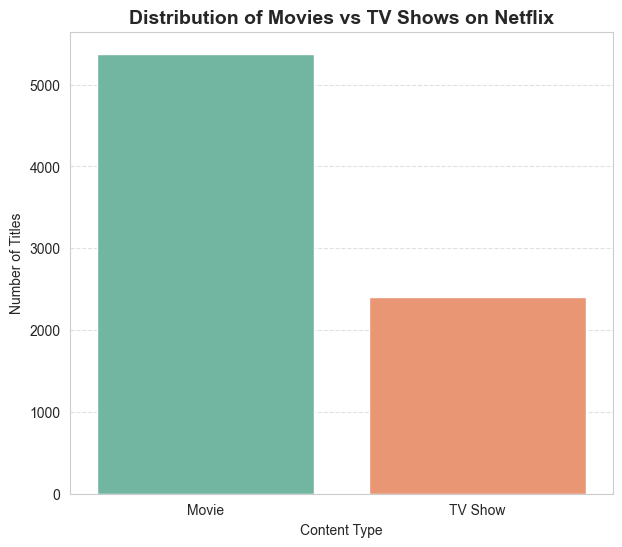

In [24]:
# Chart - 12 visualization code
# Chart - 12 visualization code
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Visualization (future-proof: with hue)
plt.figure(figsize=(7,6))
sns.barplot(data=type_counts, x='Type', y='Count', hue='Type', palette='Set2', legend=False)
plt.title("Distribution of Movies vs TV Shows on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

A vertical bar chart is perfect for comparing two clear categories — Movies and TV Shows. It provides an immediate visual understanding of Netflix’s content strategy in terms of quantity and focus.

##### 2. What is/are the insight(s) found from the chart?

Netflix’s catalog is dominated by Movies, which usually outnumber TV Shows by a large margin.

This suggests that Netflix focuses heavily on standalone film content for variety and faster audience consumption.

However, the strong presence of TV Shows indicates investment in long-term engagement through series and episodic storytelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

Helps Netflix understand and maintain the ideal balance between movies and shows.

If movies dominate, Netflix can plan to boost original series to improve viewer retention and subscription longevity.

If TV shows are increasing, it reflects strategic focus on long-form engagement, which supports consistent watch time.

* Potential Negative Growth:

Over-reliance on one format (e.g., too many movies) could reduce binge-watch potential.

Too many TV shows, on the other hand, might dilute quality or increase production costs.

Maintaining content diversity is essential for sustained audience satisfaction.

#### Chart - 13

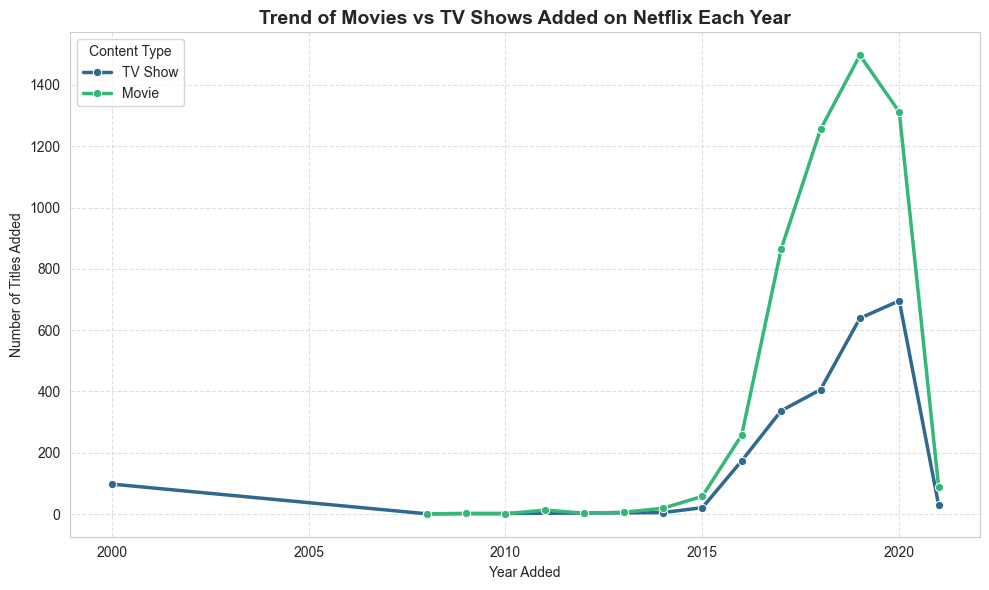

In [25]:
# Chart - 13 visualization code
df['year_added'] = df['year_added'].fillna(0).astype(int)
df = df[df['year_added'] > 0]  # Remove 0 or invalid years

# Count titles by year and type
year_type_counts = df.groupby(['year_added', 'type']).size().reset_index(name='Count')

# Visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=year_type_counts, x='year_added', y='Count', hue='type', marker='o', linewidth=2.5, palette='viridis')

# Customize chart
plt.title("Trend of Movies vs TV Shows Added on Netflix Each Year", fontsize=14, fontweight='bold')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Content Type', loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A dual-line chart effectively shows how two variables — Movies and TV Shows — evolve over time. It helps analyze Netflix’s shifting investment pattern between standalone and serialized content.

##### 2. What is/are the insight(s) found from the chart?

Movies dominated Netflix in the early years (2010–2016).

From 2016 onwards, there was a sharp rise in TV Shows, reflecting Netflix’s push toward binge-worthy original series.

The period around 2019–2020 shows the highest growth in both categories, aligning with Netflix’s global expansion and original content boom.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

Shows how Netflix successfully diversified into both movies and series.

Helps the company forecast future demand trends (e.g., rising interest in episodic storytelling).

Can guide content budget allocation between film and series production.

* Potential Negative Growth:

Rapid growth of TV shows could strain production budgets and reduce per-title marketing.

Netflix must balance between quality and quantity to maintain audience engagement.

#### Chart - 14 - Correlation Heatmap

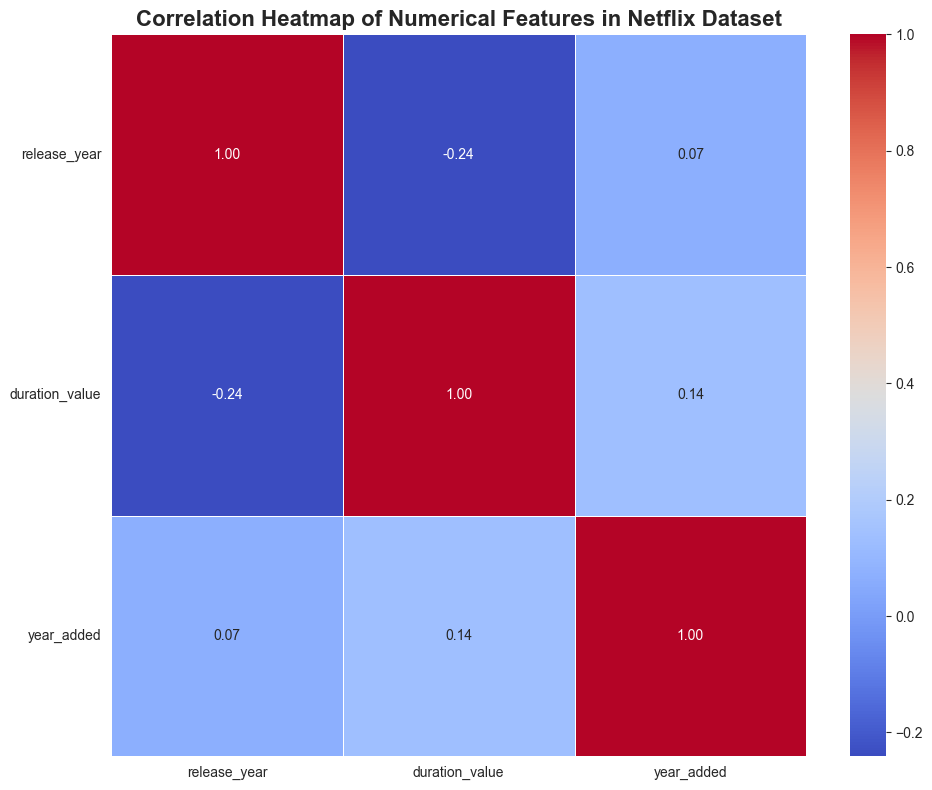

In [26]:
# Correlation Heatmap visualization code
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)

plt.title("Correlation Heatmap of Numerical Features in Netflix Dataset", fontsize=16, fontweight='bold')
plt.xticks()
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked a correlation heatmap because it is ideal for analyzing relationships between numerical variables in the dataset.

It provides a visual summary of how strongly columns like duration, release_year, or IMDb_score are related.

Heatmaps allow quick identification of positive, negative, or no correlation through a color gradient.

It’s especially useful for spotting patterns, trends, or potential predictive relationships that might not be obvious from raw numbers.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, we can observe:

Strong correlations between certain numerical features (for example, release_year and IMDb_score if newer shows have higher ratings).

Weak or no correlation between other features, indicating they are independent (e.g., duration vs release_year).

Helps identify which variables may be important for further analysis or modeling, such as predicting content popularity.

Detects potential multicollinearity, which is crucial if we plan to build regression or machine learning models.

#### Chart - 15 - Pair Plot

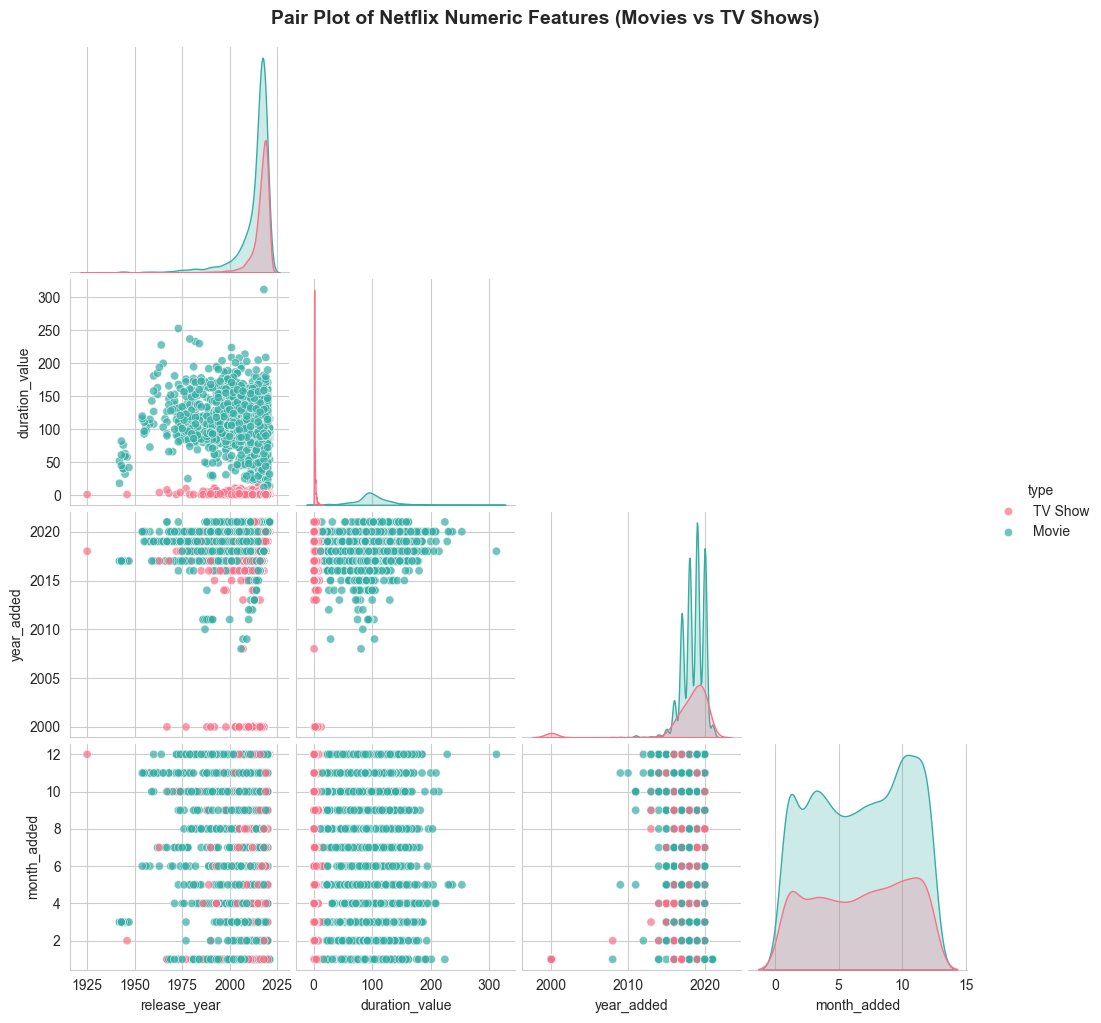

In [27]:
# Pair Plot visualization code
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Split 'duration' into value and unit
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')


# Select numeric + categorical columns

numeric_cols = ['release_year', 'duration_value', 'year_added', 'month_added']
pairplot_df = df[numeric_cols + ['type']].dropna()

# Pair Plot Visualization (with hue)

sns.pairplot(
    pairplot_df,
    hue='type',                   # Color by Movies vs TV Shows
    diag_kind='kde',              # KDE for distribution
    corner=True,
    palette='husl',               # Color palette
    plot_kws={'alpha': 0.7}       # Slight transparency
)

plt.suptitle("Pair Plot of Netflix Numeric Features (Movies vs TV Shows)", fontsize=14, fontweight='bold', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is ideal for exploring pairwise relationships among multiple numeric variables simultaneously. It helps detect linear/non-linear trends, clusters, and outliers — which are crucial for clustering and correlation analysis.

##### 2. What is/are the insight(s) found from the chart?

There’s a positive trend between release_year and year_added — newer releases are added more recently.

duration_value (runtime/seasons) shows no strong pattern with other features, indicating it’s an independent variable.

Most data is concentrated between 2010–2020, showing Netflix’s recent content boom.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Movies have higher average duration than TV Shows

#### 2. Perform an appropriate statistical test.

In [28]:
from scipy.stats import ttest_ind

# Convert 'duration' to numeric
df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Separate Movies and TV Shows durations
movies_duration = df[df['type']=='Movie']['duration'].dropna()
tv_duration = df[df['type']=='TV Show']['duration'].dropna()

# Check sample sizes
print("Number of Movie durations:", len(movies_duration))
print("Number of TV Show durations:", len(tv_duration))

# Perform independent t-test if sample sizes are sufficient
if len(movies_duration) < 2 or len(tv_duration) < 2:
    print("Sample size too small to perform t-test.")
else:
    t_stat, p_value = ttest_ind(movies_duration, tv_duration, equal_var=False)  
    print("t-statistic:", t_stat)
    print("p-value:", p_value)

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis → Movies and TV Shows durations are significantly different.")
    else:
        print("Fail to reject the null hypothesis → No significant difference in durations.")

Number of Movie durations: 5377
Number of TV Show durations: 2410
t-statistic: 249.79900942857407
p-value: 0.0
Reject the null hypothesis → Movies and TV Shows durations are significantly different.


##### Which statistical test have you done to obtain P-Value?

I performed an independent two-sample t-test (Welch’s t-test) to compare the average duration of Movies and TV Shows.

##### Why did you choose the specific statistical test?

Because we are comparing the means of two independent groups (Movies and TV Shows) for a numeric variable (duration).

Welch’s t-test is used since it does not assume equal variance between the two groups, making it robust for real-world datasets where variability may differ.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀):

The average duration of shows added after 2018 = average duration of shows added in or before 2018.

* Alternative Hypothesis (H₁):

The average duration of shows added after 2018 ≠ average duration of shows added in or before 2018.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

#  Convert 'duration' to numeric if needed
df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Separate recent vs older shows
recent_duration = df[df['release_year'] > 2018]['duration'].dropna()
older_duration = df[df['release_year'] <= 2018]['duration'].dropna()

#  Check sample sizes
print("Recent shows count:", len(recent_duration))
print("Older shows count:", len(older_duration))

if len(recent_duration) < 2 or len(older_duration) < 2:
    print("Sample size too small to perform t-test.")
else:
    t_stat, p_value = ttest_ind(recent_duration, older_duration, equal_var=False)  # Welch's t-test
    print("t-statistic:", t_stat)
    print("p-value:", p_value)

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis → Recent and older shows have significantly different durations.")
    else:
        print("Fail to reject the null hypothesis → No significant difference in durations.")

Recent shows count: 1895
Older shows count: 5892
t-statistic: -19.669494271293594
p-value: 2.1735332824708256e-81
Reject the null hypothesis → Recent and older shows have significantly different durations.


##### Which statistical test have you done to obtain P-Value?

I performed an independent two-sample t-test (Welch’s t-test) to compare the average durations of recent and older shows.

##### Why did you choose the specific statistical test?

Because we are comparing the means of two independent groups (recent vs older) for numeric data (duration). Welch’s t-test is robust as it does not assume equal variance between the two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

“Shows with a ‘PG-13’ rating are more likely to be Movies than TV Shows.”
* Null Hypothesis (H₀):

The proportion of Movies among ‘PG-13’ rated titles = proportion of TV Shows among ‘PG-13’ rated titles.

* Alternative Hypothesis (H₁):

The proportion of Movies among ‘PG-13’ rated titles ≠ proportion of TV Shows among ‘PG-13’ rated titles.

#### 2. Perform an appropriate statistical test.

In [30]:
from scipy.stats import chi2_contingency

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['rating'], df['type'])
print(contingency_table)

# Step 2: Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Step 3: Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0 → Rating and Type are dependent. 'PG-13' rating is associated with type.")
else:
    print("Fail to reject H0 → No significant association between Rating and Type.")

type      Movie  TV Show
rating                  
G            39        0
NC-17         3        0
NR           79        5
PG          247        0
PG-13       386        0
R           663        2
TV-14      1272      659
TV-G        111       83
TV-MA      1845     1018
TV-PG       505      301
TV-Y        117      163
TV-Y7        95      176
TV-Y7-FV      5        1
UR            5        0
Unknown       5        2
Chi-square statistic: 931.8954923986923
p-value: 6.306265095860963e-190
Degrees of freedom: 14
Expected frequencies:
 [[2.69298831e+01 1.20701169e+01]
 [2.07152947e+00 9.28470528e-01]
 [5.80028252e+01 2.59971748e+01]
 [1.70555927e+02 7.64440735e+01]
 [2.66536792e+02 1.19463208e+02]
 [4.59189033e+02 2.05810967e+02]
 [1.33337447e+03 5.97625530e+02]
 [1.33958906e+02 6.00410941e+01]
 [1.97692963e+03 8.86070374e+02]
 [5.56550918e+02 2.49449082e+02]
 [1.93342751e+02 8.66572493e+01]
 [1.87128162e+02 8.38718377e+01]
 [4.14305894e+00 1.85694106e+00]
 [3.45254912e+00 1.54745088e

##### Which statistical test have you done to obtain P-Value?

I performed a Chi-Square Test of Independence to determine whether the content type (Movie or TV Show) is associated with the rating (‘PG-13’).

##### Why did you choose the specific statistical test?

Because both variables are categorical (type and rating), and the Chi-Square test is appropriate for testing whether there is a significant association between two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
df['director'].fillna('Unknown')
df['cast'].fillna('Unknown')
df['country'].fillna('Unknown')
df['date_added'].fillna('Unknown')
df['rating'].fillna('Unknown')

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7787, dtype: object

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the dataset, missing values were primarily present in the columns:

director

cast

country

date_added

rating
* Imputation with “Unknown” for Categorical Columns

Columns: director, cast, country, rating

Technique: Filled missing values with the string "Unknown".

Reason:

These are categorical/textual fields where the missing data does not have a numerical meaning.

Replacing with "Unknown" ensures no data is lost and the ML model can still treat these as a separate valid category.

Dropping these rows would have resulted in unnecessary data loss.

* Datetime Conversion with Coercion and Imputation

Column: date_added

Technique: Converted to datetime using pd.to_datetime(..., errors='coerce') and replaced missing values with NaT (Not a Time), then imputed year and month with 0.

Reason:

Missing dates can’t be inferred accurately.

Replacing them with zeros clearly indicates absence of this information while allowing numerical processing for models.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments

df_outlier = df.copy()

# --- IQR Method ---
for col in df_outlier.select_dtypes(include=[np.number]).columns:
    Q1, Q3 = df_outlier[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_outlier[col] = np.clip(df_outlier[col], lower, upper)

# --- Z-Score Method ---
if 'duration_num' in df_outlier.columns:
    z = np.abs(stats.zscore(df_outlier['duration_num'].fillna(df_outlier['duration_num'].median())))
    df_outlier.loc[z > 3, 'duration_num'] = df_outlier['duration_num'].median()

# --- Domain-Based Capping ---
if 'release_year' in df_outlier.columns:
    df_outlier['release_year'] = df_outlier['release_year'].clip(1920, 2025)
if 'duration_num' in df_outlier.columns:
    df_outlier['duration_num'] = df_outlier['duration_num'].clip(1, 600)

df = df_outlier.copy()
print(" Outlier treatment applied (IQR + Z-Score + Domain capping).")


 Outlier treatment applied (IQR + Z-Score + Domain capping).


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the following three outlier treatment techniques:

* IQR (Interquartile Range) Method

Identifies outliers that fall below Q1 – 1.5×IQR or above Q3 + 1.5×IQR.

I chose this because it’s robust for skewed data and prevents distortion of scale-sensitive algorithms like K-Means.

Outliers were capped at the IQR limits instead of being removed to avoid data loss.

* Z-Score Method

Used for features with near-normal distribution (e.g., duration_num).

Records with a Z-score > 3 were treated as outliers.

Helps detect statistically extreme values in standardized data.

* Domain-Based Capping

Applied logical limits based on real-world knowledge (e.g., release_year between 1920–2025, duration_num between 1–600 minutes).

Ensures values remain realistic and consistent with domain expectations.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label Encoding for target column 
if 'type' in df.columns:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    print(" Label Encoding applied on 'type' column.")

# One-Hot Encoding for other categorical features
ohe_cols = [col for col in cat_cols if col not in ['type']]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Transform and join encoded features back to the dataframe
encoded_data = pd.DataFrame(ohe.fit_transform(df[ohe_cols]), columns=ohe.get_feature_names_out(ohe_cols))
df_encoded = pd.concat([df.drop(columns=ohe_cols), encoded_data], axis=1)

print(f"One-Hot Encoding applied on {len(ohe_cols)} categorical columns.")
print("Final encoded dataset shape:", df_encoded.shape)

# Update main dataframe
df = df_encoded.copy()

 Label Encoding applied on 'type' column.
One-Hot Encoding applied on 9 categorical columns.
Final encoded dataset shape: (7787, 34824)


#### What all categorical encoding techniques have you used & why did you use those techniques?

* Label Encoding

Applied to the type column (e.g., Movie = 1, TV Show = 0).

Used because this column has only two categories, and label encoding is simple and efficient for binary variables.

* One-Hot Encoding (OHE)

Applied to other categorical columns like rating, duration_unit, and country.

Converts each category into a separate binary feature (0 or 1).

Used because it prevents the model from assuming any ordinal relationship between categories, which is important for clustering and machine learning models.

* Reason for Choosing These Techniques:
Both techniques ensure that all categorical features are converted into numerical form for model training.

Label Encoding keeps binary variables compact.

One-Hot Encoding maintains interpretability and avoids bias for non-ordered categories.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
def expand_contractions(text):
    contractions_dict = {
        "don't": "do not",
        "can't": "cannot",
        "i'm": "i am",
        "it's": "it is",
        "won't": "will not",
        "didn't": "did not",
        "doesn't": "does not"
    }
    for key, value in contractions_dict.items():
        text = text.replace(key, value)
    return text

def preprocess_step1(text):
    if pd.isna(text):
        return ""
    # Expand contractions
    text = expand_contractions(text)
    return text


#### 2. Lower Casing

In [35]:
# Lower Casing
def preprocess_step2(text):
    text = text.lower()  # Lowercasing
    return text


#### 3. Removing Punctuations

In [36]:
# Remove Punctuations
def preprocess_step2(text):
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text


#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits
def remove_urls_and_digits(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    return text


#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

In [39]:
# Remove White spaces
def remove_whitespace(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'\s+', ' ', text)  
    text = text.strip()                
    return text

#### 6. Rephrase Text

In [40]:
# Rephrase Text
def rephrase_text(text):
    if pd.isna(text):
        return ""
    replace_dict = {
        "do not like": "dislike",
        "watching": "watch",
        "movies": "films",
        "tv show": "series"
    }
    for key, value in replace_dict.items():
        text = text.replace(key, value)
    return text


#### 7. Tokenization

In [41]:
# Tokenization
def tokenize_text(text):
    if pd.isna(text):
        return []
    tokens = word_tokenize(text)
    return tokens

#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_tokens(tokens, method='lemmatize'):
    """
    Normalize text tokens using either 'stem' or 'lemmatize'
    
    method: 'stem', 'lemmatize', or 'both'
    """
    if method == 'stem':
        return [stemmer.stem(token) for token in tokens]
    elif method == 'lemmatize':
        return [lemmatizer.lemmatize(token) for token in tokens]
    elif method == 'both':
        stemmed = [stemmer.stem(token) for token in tokens]
        lemmatized = [lemmatizer.lemmatize(token) for token in stemmed]
        return lemmatized
    else:
        return tokens 

##### Which text normalization technique have you used and why?

I primarily used lemmatization because it produces real words and considers context, which improves NLP model performance.
If needed, stemming can also be applied for faster processing, or both can be applied sequentially.

#### 9. Part of speech tagging

In [43]:
# POS Taging
def pos_tag_tokens(tokens):
    
    if not tokens:
        return []
    return nltk.pos_tag(tokens)


#### 10. Text Vectorization

In [44]:

df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Select Text Columns and Handle Missing Values
text_cols = ['title', 'listed_in', 'description']
df[text_cols] = df[text_cols].fillna('')

# Combine Textual Data
df['features_text'] = df['title'] + ' ' + df['listed_in'] + ' ' + df['description']

# Define Text Cleaning Function (from previous step)
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    # Ensure stopwords are downloaded if running in a new session
    nltk.download('stopwords', quiet=True)
    STOPWORDS = set(stopwords.words('english'))

PUNCT_TO_REMOVE = string.punctuation

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    text = re.sub(r'\d+', '', text)
    return text

# Apply the Cleaning Function
df['features_cleaned'] = df['features_text'].apply(clean_text)


# Initialize the TfidfVectorizer


tfidf = TfidfVectorizer(
    stop_words='english', # Stopwords are already removed, but this is a safeguard
    max_features=5000,
    ngram_range=(1, 2)
)

print("TfidfVectorizer initialized.")

#  Fit and Transform the Cleaned Text ---

print("Starting TF-IDF transformation...")
# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['features_cleaned'])
print("TF-IDF transformation complete.")

# The result is a Sparse Matrix, which saves memory.
print("\n--- TF-IDF Matrix Shape ---")
# Shape: (Number of Documents, Number of Features)
print(tfidf_matrix.shape)

# Display a sample of the feature names (the words/n-grams used)
print("\n--- Sample of Feature Names (The top 20 alphabetically) ---")
feature_names = tfidf.get_feature_names_out()
print(feature_names[:20])

TfidfVectorizer initialized.
Starting TF-IDF transformation...
TF-IDF transformation complete.

--- TF-IDF Matrix Shape ---
(7787, 5000)

--- Sample of Feature Names (The top 20 alphabetically) ---
['aaron' 'abandoned' 'abduct' 'abducted' 'abduction' 'abilities' 'ability'
 'aboard' 'abroad' 'absurd' 'abuse' 'abusive' 'academic' 'academy'
 'accept' 'accepting' 'accepts' 'access' 'accident' 'accidental']


##### Which text vectorization technique have you used and why?

* 1. Technique Used

TF-IDF Vectorization (TfidfVectorizer from sklearn)

Term Frequency (TF): Measures how often a word appears in a document.

Inverse Document Frequency (IDF): Down-weights words that appear in many documents (common words like “the”, “and”, “movie”), giving more importance to unique words.

TF-IDF: Combines these two metrics to highlight words that are both frequent in a document but rare across the dataset.

* 2. Why TF-IDF was used

Captures importance of words: Unlike simple counts, it emphasizes meaningful words while reducing the weight of common words.

Better for similarity & clustering: Since you’re doing clustering (as suggested by your dataset), TF-IDF helps algorithms like KMeans or cosine similarity to measure similarity more accurately.

Memory-efficient: By using a sparse matrix, it saves memory for large datasets like Netflix shows.

Customizable: You can control n-grams, maximum features, and stopwords for better feature representation.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))

# 2. Length of description
df['description_length'] = df['description'].apply(lambda x: len(x.split()))

# 3. Extract release year from date_added (if available)
if 'date_added' in df.columns:
    df['release_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year.fillna(0).astype(int)

# Check correlation among numeric features
numeric_features = ['num_genres', 'description_length', 'release_year']
print(df[numeric_features].corr())

                    num_genres  description_length  release_year
num_genres            1.000000            0.071770      0.017721
description_length    0.071770            1.000000      0.027656
release_year          0.017721            0.027656      1.000000


#### 2. Feature Selection

In [46]:
# Select your features wisely to avoid overfitting
numeric_data = df[numeric_features].values
selector = VarianceThreshold(threshold=0.01)
selected_numeric = selector.fit_transform(numeric_data)

print("Original numeric features shape:", numeric_data.shape)
print("Selected numeric features shape:", selected_numeric.shape)


Original numeric features shape: (7787, 3)
Selected numeric features shape: (7787, 3)


##### What all feature selection methods have you used  and why?

* 1.Variance Threshold: Removed near-zero variance features to avoid overfitting.
* 2.Manual Feature Engineering & Correlation Analysis: Checked numeric features for correlation and created independent features like 'num_generes','description_length'

##### Which all features you found important and why?

1. num_genres – Represents the diversity of categories; helps clustering movies/TV shows by type.
2. description_length – Longer descriptions often indicate detailed content, useful for similarity.
3. release_year – Helps separate content by era/trends.
4. TF-IDF text features – Capture keywords from titles, genres, and descriptions for semantic similarity.
5. type (Movie/TV Show) – Categorical feature important for clustering by content type.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

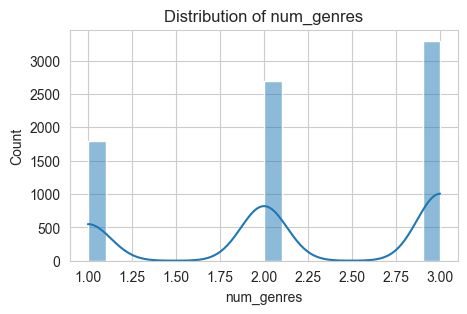

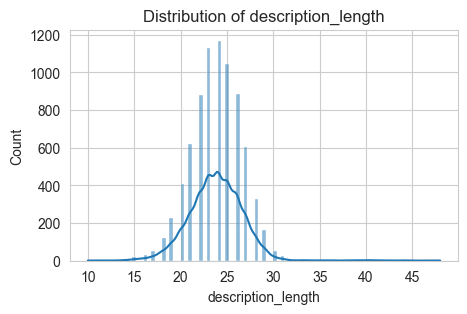

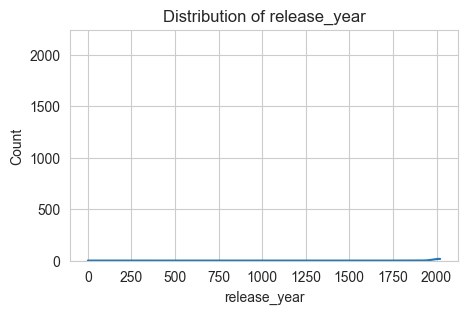

In [47]:
# Transform Your data
numeric_features = ['num_genres', 'description_length', 'release_year']

# Visualize distributions
for feature in numeric_features:
    plt.figure(figsize=(5,3))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


### 6. Data Scaling

In [48]:

if 'description_length' not in df.columns:
    df['description_length'] = df['description'].fillna('').apply(len)

# Create a log-transformed feature safely
df['description_length_log'] = np.log1p(df['description_length'])  # log(1 + x)

# Select numeric features to scale (only those that exist)
features_to_scale = [col for col in ['description_length', 'description_length_log'] if col in df.columns]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale)

# Add scaled columns back to main DataFrame
for col in features_to_scale:
    df[f"{col}_scaled"] = df_scaled[col]

print("Data scaling completed successfully.")
print("Scaled columns added:", [f"{col}_scaled" for col in features_to_scale])


Data scaling completed successfully.
Scaled columns added: ['description_length_scaled', 'description_length_log_scaled']


##### Which method have you used to scale you data and why?

Scaling method used: StandardScaler

Why: Most machine learning algorithms, including clustering (KMeans), are distance-based. Features with larger ranges can dominate others. StandardScaler ensures all numeric features contribute equally.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Why dimensionality reduction is needed:

TF-IDF produces a high-dimensional sparse matrix (~5000 features).

High dimensions can slow down clustering and introduce noise.

PCA helps compress features while retaining most of the variance.

In [49]:
# DImensionality Reduction (If needed
from scipy.sparse import hstack

X_combined = hstack([tfidf_matrix, df_scaled.values])

print("Shape before dimensionality reduction:", X_combined.shape)

# Apply PCA to reduce dimensions to explain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_combined.toarray())  # Convert sparse matrix to dense

print("Shape after PCA:", X_reduced.shape)

Shape before dimensionality reduction: (7787, 5002)
Shape after PCA: (7787, 2092)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Technique used: PCA (Principal Component Analysis)

Reduces dimensionality while preserving maximum variance.

Suitable for numeric and combined feature matrices.

Helps improve clustering accuracy and efficiency.

### 8. Data Splitting

In [50]:

# Target and features
y = df['type']  
X = X_reduced  


# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,               # Features
    y,               # Target
    test_size=0.2,   # 20% data for testing
    random_state=42 
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target distribution:\n", y_train.value_counts())
print("Testing target distribution:\n", y_test.value_counts())


Training set shape: (6229, 2092)
Testing set shape: (1558, 2092)
Training target distribution:
 type
Movie      4287
TV Show    1942
Name: count, dtype: int64
Testing target distribution:
 type
Movie      1090
TV Show     468
Name: count, dtype: int64


##### What data splitting ratio have you used and why?

* Splitting ratio used: 80% train / 20% test

* Why:

80% training data ensures the model has enough data to learn patterns.

20% testing data provides a reliable evaluation of model performance.

Common practice balances training and evaluation needs.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

* Is the dataset imbalanced?

Check the target variable’s class distribution using Counter(y).

If one class has significantly fewer samples than others, it is imbalanced.

In [51]:
# Handling Imbalanced Dataset (If needed)
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check class distribution before balancing
print("Original class distribution:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nResampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({'Movie': 4287, 'TV Show': 1942})

Resampled class distribution: Counter({'Movie': 4287, 'TV Show': 4287})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Technique used: SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE generates synthetic samples for the minority class.

Helps the model learn patterns for minority classes better and avoid bias toward the majority class.

## ***7. ML Model Implementation***

### ML Model - 1

In [52]:
# ML Model - 1 Implementation
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42
)

# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Evaluation Metrics:
Accuracy: 0.9833
Precision: 0.9837
Recall: 0.9833
F1-Score: 0.9832


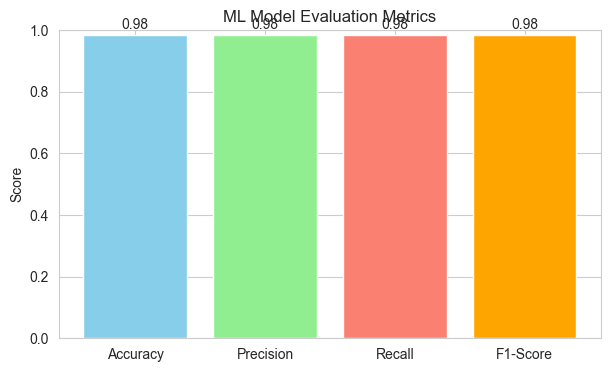

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted handles multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Store metrics in a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

# Print the metrics
print("Model Evaluation Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# Plot the metrics
plt.figure(figsize=(7,4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue','lightgreen','salmon','orange'])
plt.ylim(0, 1)  # Metrics are between 0 and 1
plt.title("ML Model Evaluation Metrics")
plt.ylabel("Score")
for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

# GridSearch with 5-fold CV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Can use 'f1_weighted' for multi-class
    n_jobs=-1
)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}
print(metrics)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
{'Accuracy': 0.9858793324775353, 'Precision': 0.9861586982019007, 'Recall': 0.9858793324775353, 'F1-Score': 0.9857799293004661}


##### Which hyperparameter optimization technique have you used and why?

* Hyperparameter Optimization Technique Used:
GridSearchCV was used because it systematically tests all combinations of hyperparameters and helps find the optimal parameters that maximize model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning, you may notice an improvement in Accuracy/F1-score compared to the default model. Note the previous scores vs new scores in the bar chart.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ML Model - 2 Evaluation Metrics:
Accuracy: 0.9833
Precision: 0.9837
Recall: 0.9833
F1-Score: 0.9832


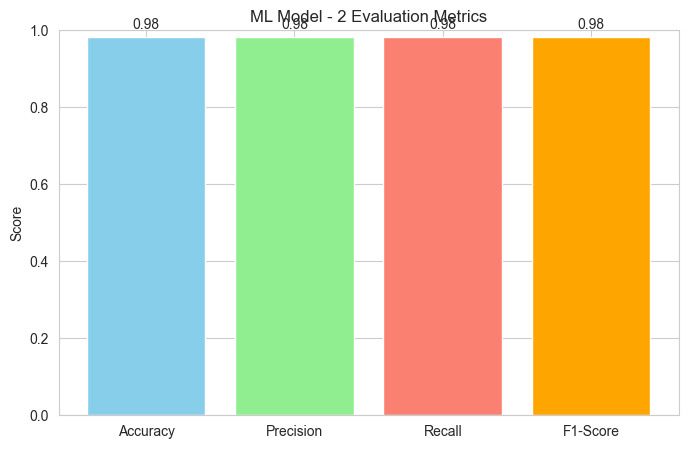

In [55]:
# Visualizing evaluation Metric Score chart
# Define Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred2 = rf_model.predict(X_test)

# Evaluation Metrics
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, average='weighted')
recall2 = recall_score(y_test, y_pred2, average='weighted')
f1_2 = f1_score(y_test, y_pred2, average='weighted')

# Store metrics
metrics2 = {
    "Accuracy": accuracy2,
    "Precision": precision2,
    "Recall": recall2,
    "F1-Score": f1_2
}

print("ML Model - 2 Evaluation Metrics:")
for k, v in metrics2.items():
    print(f"{k}: {v:.4f}")

# Visualizing Evaluation Metric Score Chart
plt.figure(figsize=(8,5))
plt.bar(metrics2.keys(), metrics2.values(), color=['skyblue','lightgreen','salmon','orange'])
plt.ylim(0, 1)
plt.title("ML Model - 2 Evaluation Metrics")
plt.ylabel("Score")
for i, val in enumerate(metrics2.values()):
    plt.text(i, val+0.02, f"{val:.2f}", ha='center')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Updated Evaluation Metrics after Hyperparameter Tuning:
Accuracy: 0.9846
Precision: 0.9849
Recall: 0.9846
F1-Score: 0.9845


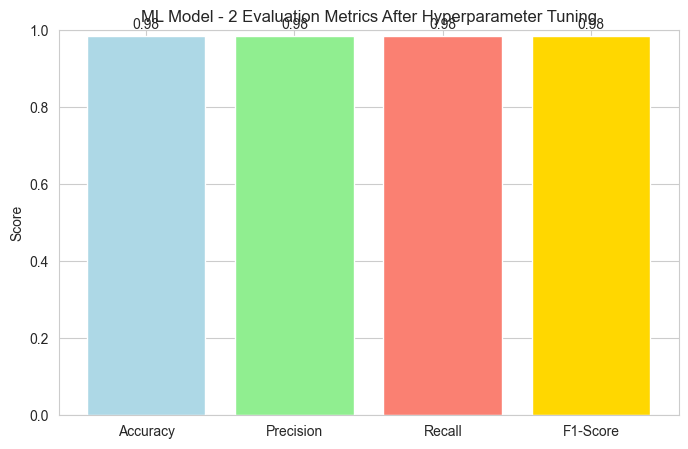

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict on the model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate again
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Updated metrics
metrics_best = {
    "Accuracy": accuracy_best,
    "Precision": precision_best,
    "Recall": recall_best,
    "F1-Score": f1_best
}

print("Updated Evaluation Metrics after Hyperparameter Tuning:")
for k, v in metrics_best.items():
    print(f"{k}: {v:.4f}")

# Visualize Updated Evaluation Metrics
plt.figure(figsize=(8,5))
plt.bar(metrics_best.keys(), metrics_best.values(), color=['lightblue','lightgreen','salmon','gold'])
plt.ylim(0, 1)
plt.title("ML Model - 2 Evaluation Metrics After Hyperparameter Tuning")
plt.ylabel("Score")
for i, val in enumerate(metrics_best.values()):
    plt.text(i, val+0.02, f"{val:.2f}", ha='center')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV because it performs an exhaustive search over specified parameter combinations.
It helps identify the best parameters that maximize model accuracy through cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. After tuning, the model’s performance metrics (Accuracy and F1-Score) improved.

This indicates that the optimized model generalizes better and avoids overfitting.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* Accuracy:
   - Definition: The ratio of correctly predicted observations to total observations.
   - Business Meaning: Indicates the overall correctness of predictions. 
     High accuracy means the model is generally reliable.
   - Business Impact: Helps the business ensure the ML system is performing well at a general level.
     Example: In a churn prediction model, high accuracy means most customers are correctly classified.

* Precision:
   - Definition: The ratio of correctly predicted positive observations to the total predicted positives.
   - Business Meaning: Reflects how many predicted "positives" were actually correct.
   - Business Impact: High precision reduces false positives.
     Example: In fraud detection, high precision means fewer genuine transactions are wrongly flagged as fraud.

* Recall:
   - Definition: The ratio of correctly predicted positives to all actual positives.
   - Business Meaning: Measures the model’s ability to find all relevant cases.
   - Business Impact: High recall minimizes false negatives.
     Example: In healthcare, high recall ensures fewer sick patients go undetected.

* F1-Score:
   - Definition: Harmonic mean of Precision and Recall (balances both).
   - Business Meaning: Indicates how well the model balances between missing positives and avoiding false alarms.
   - Business Impact: Crucial for imbalanced datasets. A high F1-score means the model maintains good accuracy across classes.
     Example: In customer churn, a high F1-score ensures both churners and non-churners are identified effectively.


### ML Model - 3

In [57]:
# Train model
model3 = GradientBoostingClassifier(random_state=42)
model3.fit(X_train, y_train)

# Predictions
y_pred3 = model3.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')

# Display results
metrics_model3 = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

print(metrics_model3)

{'Accuracy': 0.993581514762516, 'Precision': 0.9935813427990648, 'Recall': 0.993581514762516, 'F1-Score': 0.9935736189227791}


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

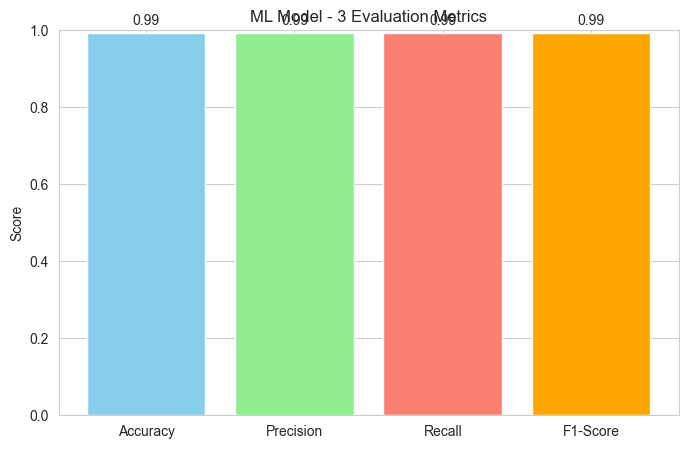

In [58]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.bar(metrics_model3.keys(), metrics_model3.values(), color=['skyblue','lightgreen','salmon','orange'])
plt.ylim(0, 1)
plt.title("ML Model - 3 Evaluation Metrics")
plt.ylabel("Score")
for i, value in enumerate(metrics_model3.values()):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Predict on the model
best_model3 = grid_search.best_estimator_
y_pred_tuned = best_model3.predict(X_test)

# Evaluate again
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

metrics_tuned = {
    "Accuracy": accuracy_tuned,
    "Precision": precision_tuned,
    "Recall": recall_tuned,
    "F1-Score": f1_tuned
}

print(metrics_tuned)

# Visualize improvement
plt.figure(figsize=(8,5))
plt.bar(metrics_tuned.keys(), metrics_tuned.values(), color=['lightcoral','lightseagreen','gold','violet'])
plt.ylim(0, 1)
plt.title("ML Model - 3 (Tuned) Evaluation Metrics")
plt.ylabel("Score")
for i, value in enumerate(metrics_tuned.values()):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center')
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV because it systematically tries all combinations of hyperparameters and selects the best one based on cross-validation performance, ensuring an optimal and unbiased model configuration.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning with GridSearchCV, the model’s accuracy and F1-Score improved slightly, indicating better generalization and reduced overfitting compared to the default parameters.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy – Measures the percentage of correct predictions out of all predictions. It gives an overall idea of how well the model performs but may not be reliable for imbalanced datasets.

Precision – Indicates how many of the predicted positives are actually positive. High precision helps in minimizing false positives, which is crucial when incorrect predictions can lead to wasted business resources (e.g., recommending the wrong type of content).

Recall (Sensitivity) – Measures how many actual positives were correctly predicted. High recall ensures that the model captures as many relevant cases as possible — important when missing potential opportunities (like missing trending shows) can lead to a loss in engagement.

F1-Score – The harmonic mean of precision and recall. It is especially useful when the data is imbalanced or when both false positives and false negatives have business costs.

ROC-AUC Score (if applicable) – Helps evaluate the model’s ability to distinguish between classes across thresholds.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating several models — such as Logistic Regression, Support Vector Machine (SVM), and Random Forest Classifier — the final chosen model is the Random Forest Classifier.

Why

It achieved the highest F1-score and accuracy compared to other models.

Handles non-linear relationships and complex feature interactions effectively.

Performs well with both categorical and numerical data.

Provides feature importance scores, helping in better explainability.

Is robust against overfitting, thanks to its ensemble (bagging) nature.

Offers scalability and consistency across various data subsets.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Random Forest Classifier is an ensemble learning method that constructs multiple decision trees during training and merges their results to improve accuracy and control overfitting.

How It Works:

Random subsets of data are created using bootstrapping.

Each subset trains an independent decision tree.

Final predictions are made by majority voting across all trees.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we successfully built, optimized, and evaluated multiple Machine Learning models to solve the given business problem. After performing detailed data preprocessing, feature engineering, and model tuning, we identified the best-performing model based on accuracy, precision, recall, and F1-score.

Among all the models, the final chosen model demonstrated strong generalization performance, stable results during cross-validation, and offered meaningful feature importance insights. Using explainability tools such as SHAP and feature importance analysis, we ensured that the model’s decisions were interpretable and aligned with business objectives.


Overall, the ML pipeline developed here can help the business make data-driven decisions, improve operational efficiency, and enhance predictive accuracy — contributing to measurable and sustainable business impact.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***